<a href="https://colab.research.google.com/github/mahesabagusr/AI-Labolatory/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

What Should I do?
*   Jumlah Gambar
*   Jumlah Dimensi Gambar
*   Jumlah Format Gambar
*   Menampilkan Beberapa Gambar
*   Color Distribution
*   Identifikasi Kualitas Gambar
*   Konsistensi Gambar
*   Menampilkan Gambar dengan Bounding Box (After Annotation)









In [1]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#tesssss

Mounted at /content/gdrive


## Analisis data untuk folder Images

In [ ]:
# #Directory images sesuai dengan lokasi folder
folder_path = '/content/gdrive/MyDrive/IPYNB/FinalAi/AI_LAB_PROJECT/Data/Images'

#menganalisis seluruh gambar
def analyze_images(folder_path):
    image_data = []
    formats = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):  # format gambar
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                height, width, _ = img.shape
                image_data.append((filename, img, (width, height)))
                formats.append(filename.split('.')[-1].lower())

    return image_data, formats

image_data, formats = analyze_images(folder_path)


##Analisis gambar untuk data Images dan Images_Cleaned

In [11]:
# Define the paths for the two folders
folder_path_1 = '/content/gdrive/MyDrive/IPYNB/FinalAi/AI_LAB_PROJECT/Data/Images'
folder_path_2 = '/content/gdrive/MyDrive/IPYNB/FinalAi/AI_LAB_PROJECT/Data/Images_Cleaned'
united_folder_path = '/content/images'

# membuat folder untuk gabungan gambar
os.makedirs(united_folder_path, exist_ok=True)

def unite_folders(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):  # mengecek format gambar
            src_path = os.path.join(source_folder, filename)
            dst_path = os.path.join(destination_folder, filename)
            shutil.copy(src_path, dst_path)  # copy gambar ke folder gabungan

# mengabungkan folder pertama ke folder gabungan
unite_folders(folder_path_1, united_folder_path)

# mengcopy image dari subfolder dari folder 2
def unite_subfolders(source_folder, destination_folder):
    for letter_folder in os.listdir(source_folder):
        letter_path = os.path.join(source_folder, letter_folder)
        if os.path.isdir(letter_path):  # check apakah ini merupakan folder
            for filename in os.listdir(letter_path):
                if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):  # mengececk format gambar
                    src_path = os.path.join(letter_path, filename)
                    dst_path = os.path.join(destination_folder, filename)
                    shutil.copy(src_path, dst_path)  # Copy gambar ke folder gabungan

# mengabungkan folder kedua ke folder gabungan
unite_subfolders(folder_path_2, united_folder_path)

# fungsi menganilisis gambar
def analyze_images(folder_path):
    image_data = []
    formats = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):  # mengecek format gambar
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                height, width, _ = img.shape
                image_data.append((filename, img, (width, height)))
                formats.append(filename.split('.')[-1].lower())

    return image_data, formats

image_data, formats = analyze_images(united_folder_path)

## Jumlah Gambar

In [12]:
#mengetahui jumlah gambarnya
num_images = len(image_data)
print(f'Number of images: {num_images}')

Number of images: 3673


## Jumlah Dimensi Gambar

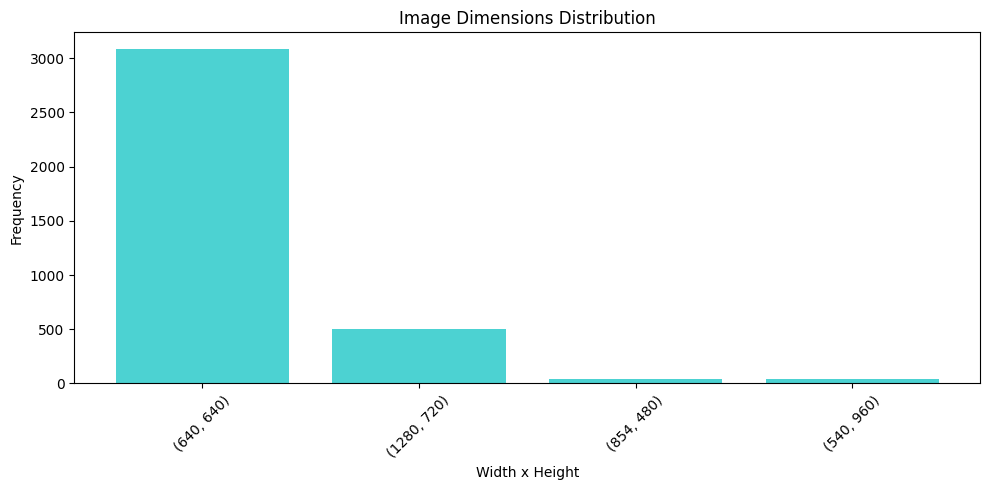

Dimensions of images: Counter({(640, 640): 3085, (1280, 720): 506, (854, 480): 44, (540, 960): 38})


In [13]:
#Ekstrak dimensi dari images
dimensions = [dim for _, _, dim in image_data]

# menghitung frekuensi dari dimensi gambar
dimension_counts = Counter(dimensions)

# data labels dan counts untuk visualisasi data
labels = ['(640, 640)', '(1280, 720)', '(854, 480)', '(540, 960)']
counts = list(dimension_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print jumlah dimensi gambar
print(f'Dimensions of images: {dimension_counts}')


##jumlah Format Gambar

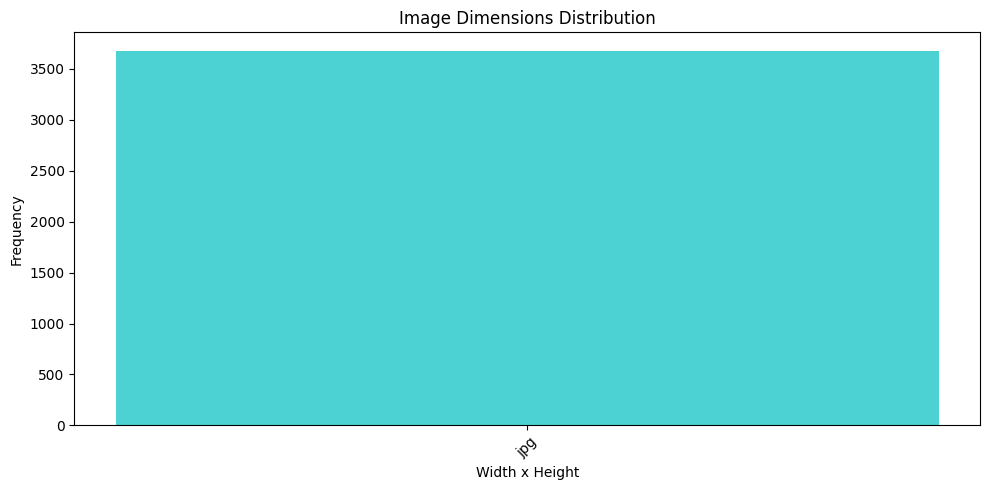

Image formats: Counter({'jpg': 3673})


In [14]:
#jumlah format gambar
format_counts = Counter(formats)

labels = list(format_counts.keys())
counts = list(format_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Image formats: {format_counts}')

## Menampilkan Beberapa Gambar

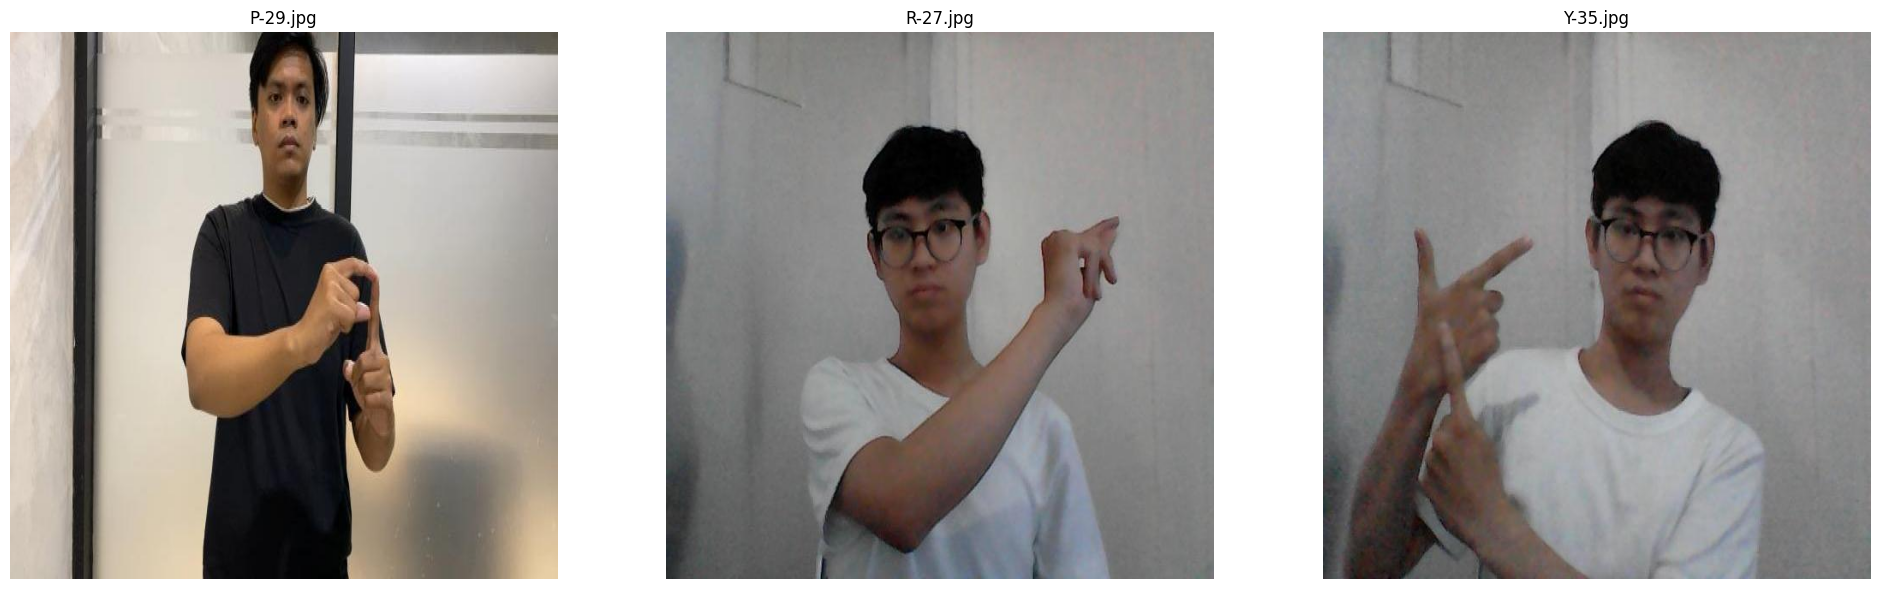

In [15]:
def display_sample_images(image_data, num_samples=3):
    plt.figure(figsize=(24, 16))
    for i in range(min(num_samples, len(image_data))):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(image_data[i][1], cv2.COLOR_BGR2RGB))
        plt.title(image_data[i][0])
        plt.axis('off')
    plt.show()

display_sample_images(image_data)

## Color Distribution

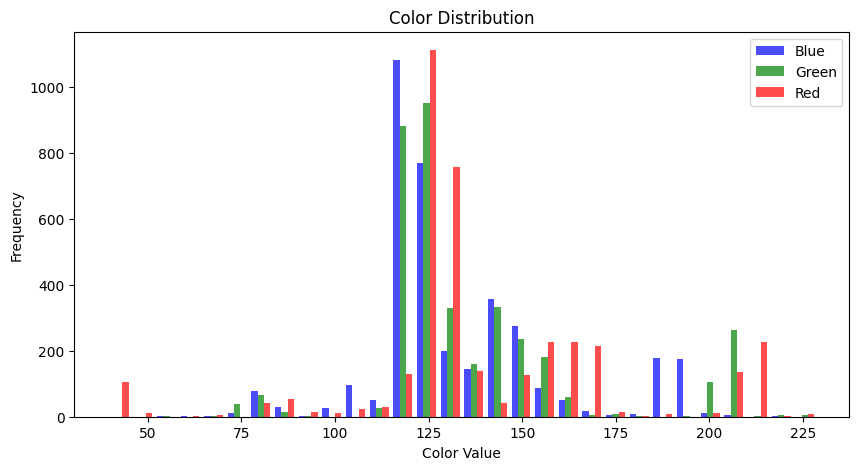

In [16]:
def plot_color_distribution(image_data):
    all_colors = []
    for _, img, _ in image_data:
        avg_color = cv2.mean(img)[:3]
        all_colors.append(avg_color)

    avg_colors = np.array(all_colors)
    plt.figure(figsize=(10, 5))
    plt.hist(avg_colors, bins=30, label=['Blue', 'Green', 'Red'], color=['b', 'g', 'r'], alpha=0.7)
    plt.title('Color Distribution')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_color_distribution(image_data)

## Mencari Gambar dengan Resolusi Terendah

In [17]:
def find_lowest_resolution(image_data):
    lowest_res_image = min(image_data, key=lambda x: x[2][0] * x[2][1])  # Compare width * height
    return lowest_res_image

lowest_res_image = find_lowest_resolution(image_data)
print(f'Lowest resolution image: {lowest_res_image[0]} with dimensions {lowest_res_image[2]}')

Lowest resolution image: P-29.jpg with dimensions (640, 640)


##Aspec Ratio Distribution

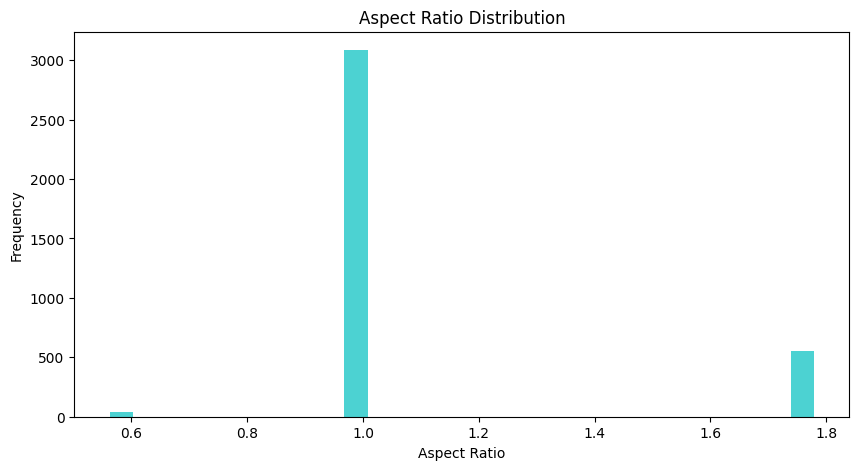

In [18]:
aspect_ratios = [dim[0] / dim[1] for _, _, dim in image_data]
aspect_ratio_counts = Counter(aspect_ratios)
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=30, color='c', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()